# Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Data

In [2]:
data = np.random.randint(0, 256, (100, 3), dtype=int)
data = data / 255.0

# Kohonen Network

In [3]:
class KohonenNetwork:
    def __init__(self, map_dim, epochs, learning_rate):
        self.map_dim = map_dim
        self.map = np.random.uniform(0, 1, size=(self.map_dim[0], self.map_dim[1], 3))
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.initial_learning_rate = learning_rate

    def compute_variables(self, epoch=0):
        self.radius = self.map_dim[0] / 2 * (1 - epoch / self.epochs)
        self.learning_rate = self.initial_learning_rate * (1 - epoch / self.epochs)

    def euclidean_distance(self, a, b):
        return np.linalg.norm(a - b)
    
    def winner(self, x):
        min_dist = float('inf')
        winner_coords = (0, 0)
        for i in range(self.map_dim[0]):
            for j in range(self.map_dim[1]):
                dist = self.euclidean_distance(self.map[i][j], x)
                if dist < min_dist:
                    min_dist = dist
                    winner_coords = (i, j)
                    
        return winner_coords

    def update_weights(self, x, winner_coords):
        for i in range(self.map_dim[0]):
            for j in range(self.map_dim[1]):
                dist = self.euclidean_distance(np.array([i, j]), np.array(winner_coords))
                if dist < self.radius:
                    influence = np.exp(-dist / (2 * (radius ** 2)))
                    self.map[i][j] += self.learning_rate * influence * (x - self.map[i][j])

    def train(self, data):
        n = len(data)
        for epoch in range(self.epochs):
            self.compute_variables(epoch)
            winner_coords = self.winner(data[epoch % n])
            self.update_weights(data[epoch % n], winner_coords)

# Train

In [11]:
som = KohonenNetwork(map_dim=(10, 10), epochs=3000, learning_rate=0.04)

In [12]:
map_before_train = som.map.copy()

In [13]:
som.train(data)

In [14]:
map_after_train = som.map.copy()

# Results 

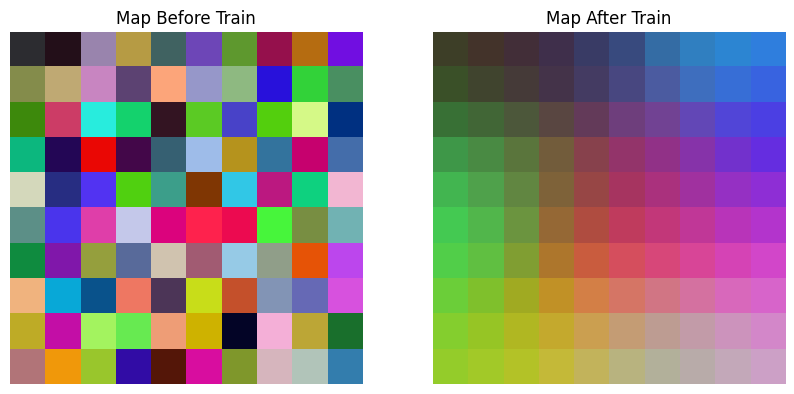

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].imshow(map_before_train)
axs[0].set_title("Map Before Train")
axs[0].axis("off")

axs[1].imshow(map_after_train)
axs[1].set_title("Map After Train")
axs[1].axis("off")

plt.show()